<a href="https://colab.research.google.com/github/indhra007/helloworld/blob/master/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
from sklearn import *
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = datasets.load_iris()

In [3]:
data.feature_names # features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data.DESCR # describing 

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
data.filename # location of file used

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**TUTORIAL**

In [0]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url,sep=';')

In [9]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
data.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [12]:
data['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0            

In [15]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
## replacing some values with other

bins = (2,5,8)
groupnames= [ 'bad','good']
data['quality'] = pd.cut(data['quality'],bins=bins,labels=groupnames)
data['quality']


0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]

In [17]:
data['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [0]:
qualityencode = LabelEncoder()

In [19]:
data['quality']=qualityencode.fit_transform(data['quality'])
data['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [20]:
data['quality'].unique()

array([0, 1])

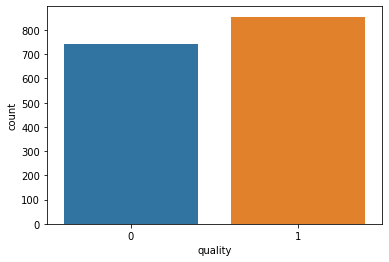

In [21]:
sns.countplot(data['quality'])

In [22]:
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [23]:
#now separate the dataset as reponse variable and feature variables

X = data.drop('quality',axis=1)
Y = data['quality']
print(X,Y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.5,random_state=123,shuffle=False) # splitting data

In [25]:
xtrain

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
794,10.1,0.27,0.54,2.3,0.065,7.0,26.0,0.99531,3.17,0.53,12.5
795,10.8,0.89,0.30,2.6,0.132,7.0,60.0,0.99786,2.99,1.18,10.2
796,8.7,0.46,0.31,2.5,0.126,24.0,64.0,0.99746,3.10,0.74,9.6
797,9.3,0.37,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8


In [26]:
ytrain

0      0
1      0
2      0
3      1
4      0
      ..
794    1
795    0
796    0
797    1
798    1
Name: quality, Length: 799, dtype: int64

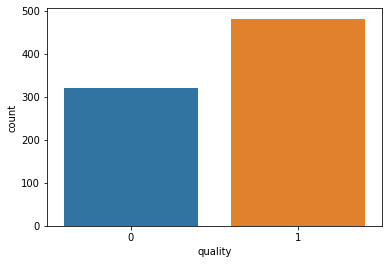

In [27]:
sns.countplot(ytest)

Applying STANDARD SCALING to the data

In [0]:
sc = StandardScaler()
Xtrain = sc.fit_transform(xtrain)
Xtest = sc.transform(xtest)

In [29]:
Xtrain.view()

array([[-0.77232784,  0.88495761, -1.47157856, ...,  1.41349944,
        -0.58691095, -0.71205137],
       [-0.56074206,  1.88045705, -1.47157856, ..., -0.53686364,
         0.02782602, -0.30377793],
       [-0.56074206,  1.21679076, -1.27784133, ..., -0.15937401,
        -0.12585823, -0.30377793],
       ...,
       [-0.08467404, -0.44237498,  0.029885  , ..., -1.16601302,
         0.3351945 , -0.50791465],
       [ 0.23270464, -0.9401247 ,  0.65953101, ..., -0.28520389,
         0.69379106,  0.71690569],
       [ 0.28560109, -0.22115288,  0.17518792, ...,  0.0293708 ,
        -0.79182327,  0.61483733]])

In [30]:
Xtest[:5]

array([[ 0.28560109, -0.22115288,  0.17518792,  0.77925236, -0.20380225,
        -1.02462602, -1.07252196,  0.62712687,  0.0293708 , -0.79182327,
         0.61483733],
       [-0.87812073,  0.38720789, -1.08410409,  1.09624982, -0.20380225,
         1.13601241,  1.67035581, -0.73382614, -0.22228895, -0.84305135,
        -0.71205137],
       [-0.13757048,  0.05537474, -1.03566979,  0.54150426, -0.46099224,
        -0.71596339, -0.98498331, -0.17518167, -0.34811882, -1.20164791,
        -0.0996412 ],
       [-1.98894611,  0.24894408, -1.47157856, -0.72648557, -0.90188935,
        -0.09863812,  1.02840569, -2.97434703,  1.72807413,  1.35975611,
         2.86034128],
       [-0.6136385 ,  0.11068027, -1.08410409, -0.09249065,  0.38406057,
        -0.09863812, -0.13877634, -0.32375733, -0.28520389, -0.07463014,
        -0.50791465]])

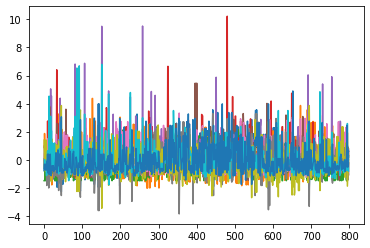

In [31]:
plt.plot(Xtrain) # range of values after scaling

Random Forest Classifier

In [32]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
ypred = rfc.predict(Xtest)

In [34]:
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

lets see how our model performed

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       319
           1       0.78      0.84      0.81       481

    accuracy                           0.76       800
   macro avg       0.75      0.74      0.74       800
weighted avg       0.76      0.76      0.76       800



In [36]:
print(confusion_matrix(ytest,ypred))

[[204 115]
 [ 78 403]]


## **SVM Classifier**

In [0]:
svmclass = svm.SVC()
svmclass.fit(xtrain,ytrain)
ypred1= svmclass.predict(xtest)

In [45]:
print(classification_report(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.57      0.33      0.41       319
           1       0.65      0.83      0.73       481

    accuracy                           0.63       800
   macro avg       0.61      0.58      0.57       800
weighted avg       0.62      0.63      0.60       800

[[104 215]
 [ 80 401]]


## NEURAL **NETWORK**

In [0]:
mlpc = MLPClassifier(hidden_layer_sizes=(50,50,50,10),max_iter=500)
mlpc.fit(xtrain,ytrain)
ypred2 = mlpc.predict(xtest)

In [68]:
print(classification_report(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       319
           1       0.73      0.72      0.72       481

    accuracy                           0.67       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.67      0.67      0.67       800

[[193 126]
 [137 344]]


In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred2))

0.67125
